In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics
from seaborn import barplot

In [3]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\feature_importances.pkl"
feature_importances = pd.read_pickle(path)
feature_importances = pd.DataFrame(feature_importances.reset_index())
punc_feature_names = {'punc_!': 'punc_0', 'punc_"': 'punc_1', 'punc_#': 'punc_2', 'punc_$': 'punc_3', 'punc_%': 'punc_4', 'punc_&': 'punc_5', "punc_'": 'punc_6', 'punc_(': 'punc_7', 'punc_)': 'punc_8', 'punc_*': 'punc_9', 'punc_+': 'punc_10', 'punc_,': 'punc_11', 'punc_-': 'punc_12', 'punc_.': 'punc_13', 'punc_/': 'punc_14', 'punc_:': 'punc_15', 'punc_;': 'punc_16', 'punc_<': 'punc_17', 'punc_=': 'punc_18', 'punc_>': 'punc_19', 'punc_?': 'punc_20', 'punc_@': 'punc_21', 'punc_[': 'punc_22', 'punc_\\': 'punc_23', 'punc_]': 'punc_24', 'punc_^': 'punc_25', 'punc__': 'punc_26', 'punc_`': 'punc_27', 'punc_{': 'punc_28', 'punc_|': 'punc_29', 'punc_}': 'punc_30', 'punc_~': 'punc_31'}
punc_feature_names = {v:k for k,v in punc_feature_names.items()}
feature_importances['Feature Names'] = feature_importances['Feature Names'].map(lambda name: punc_feature_names.get(name, name))
feature_importances.columns = ["Feature Names", "Feature Importances"]
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\test_predictions.pkl"
test_predictions = pd.read_pickle(path)

In [39]:
tfidf_importances = feature_importances[feature_importances.apply(lambda row: "tfidf_" in row["Feature Names"], axis = 1)]
punctuation_importances = feature_importances[feature_importances.apply(lambda row: "punc_" in row["Feature Names"], axis = 1)]

In [57]:
topic_similarity_importances = feature_importances[feature_importances.apply(lambda row: "topic_similarity_" in row["Feature Names"], axis = 1)]
summary_embeddings_importances = feature_importances[feature_importances.apply(lambda row: "summary_embeddings_" in row["Feature Names"], axis = 1)]
keyword_embeddings_importances = feature_importances[feature_importances.apply(lambda row: "keyword_embeddings_" in row["Feature Names"], axis = 1)]
review_embeddings_importances = feature_importances[feature_importances.apply(lambda row: "review_embeddings_" in row["Feature Names"], axis = 1)]
sentiment_lexicon_importances = feature_importances[feature_importances.apply(lambda row: "sentiment_lexicon_score_" in row["Feature Names"], axis = 1)]
other_features_importances = feature_importances[feature_importances.apply(lambda row: "num_" in row["Feature Names"], axis = 1)]

In [88]:
aggregated_importances = {
    "sentiment_lexicon":sentiment_lexicon_importances['Feature Importances'].mean(),
    "other_features":other_features_importances['Feature Importances'].mean(),
    "topic_similarity":topic_similarity_importances['Feature Importances'].mean(),
    "summary_embeddings":summary_embeddings_importances['Feature Importances'].mean(),
    "review_embeddings":review_embeddings_importances['Feature Importances'].mean(),
    "keyword_embeddings":keyword_embeddings_importances['Feature Importances'].mean(),
    "punctuation":punctuation_importances['Feature Importances'].mean(),
    "tfidf":tfidf_importances['Feature Importances'].mean()
}

### visualizations

<AxesSubplot:xlabel='Feature Importances', ylabel='Feature Names'>

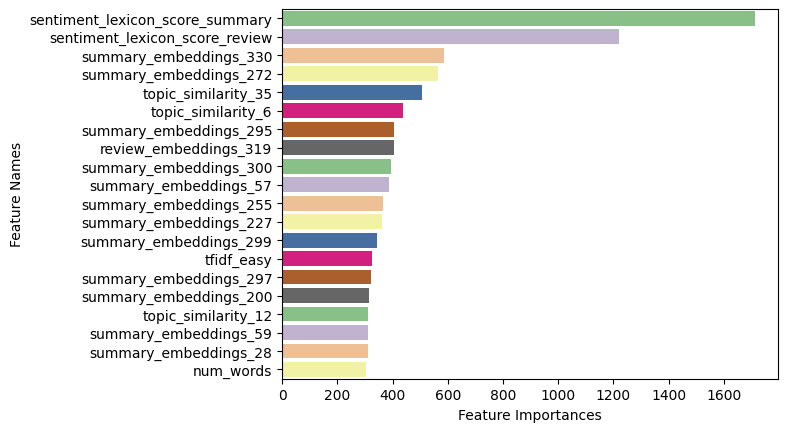

In [26]:
barplot(feature_importances.iloc[:20], x = "Feature Importances", y  = "Feature Names", palette = "Accent")

<AxesSubplot:xlabel='Feature Importances', ylabel='Feature Names'>

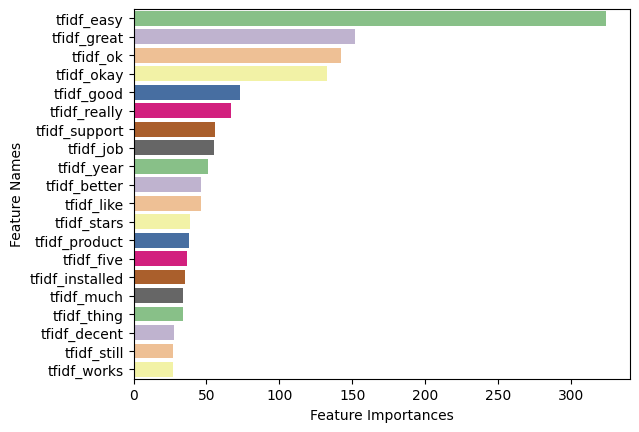

In [102]:
barplot(tfidf_importances.iloc[:20], x = "Feature Importances", y  = "Feature Names", palette = "Accent")

<AxesSubplot:xlabel='Feature Importances', ylabel='Feature Names'>

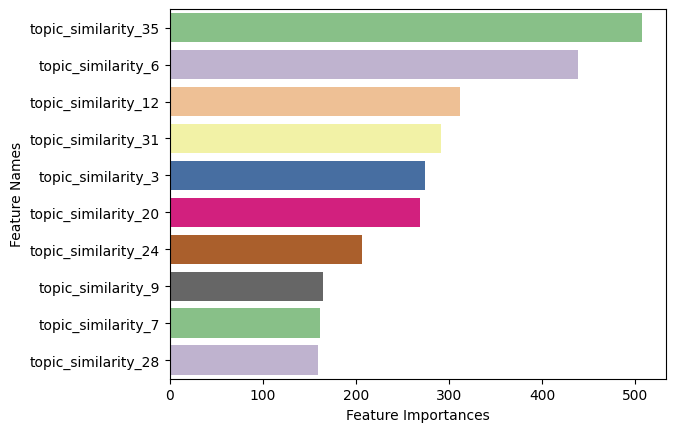

In [103]:
barplot(topic_similarity_importances.iloc[:10], x = "Feature Importances", y  = "Feature Names", palette = "Accent")

<AxesSubplot:xlabel='Feature Importances', ylabel='Feature Names'>

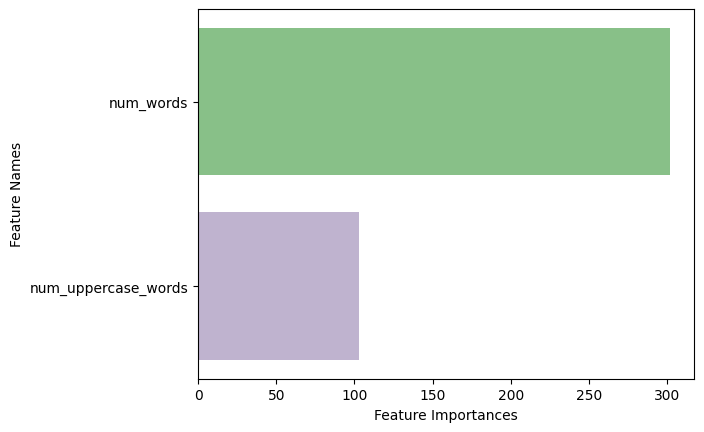

In [104]:
barplot(other_features_importances.iloc[:10], x = "Feature Importances", y  = "Feature Names", palette = "Accent")


<AxesSubplot:xlabel='Feature Importances', ylabel='Feature Names'>

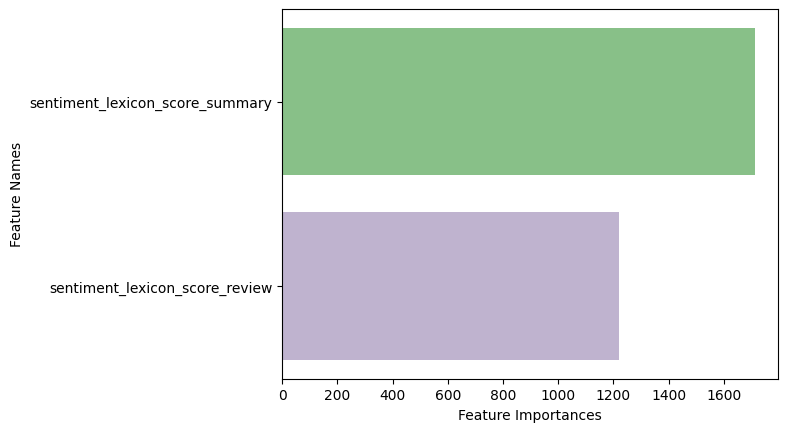

In [105]:
barplot(sentiment_lexicon_importances.iloc[:10], x = "Feature Importances", y  = "Feature Names", palette = "Accent")


<AxesSubplot:xlabel='Feature Importances', ylabel='Feature Names'>

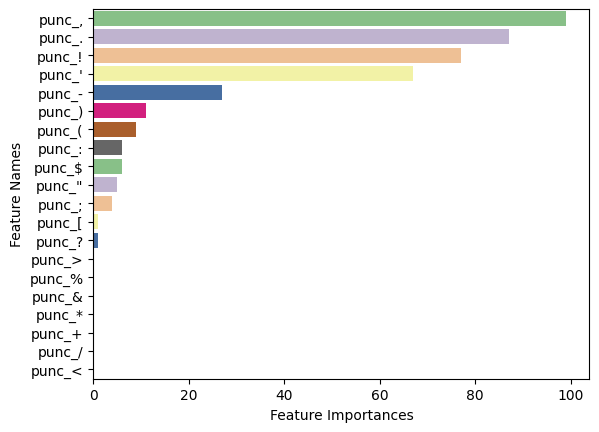

In [106]:
barplot(punctuation_importances.iloc[:20], x = "Feature Importances", y  = "Feature Names", palette = "Accent")

<AxesSubplot:>

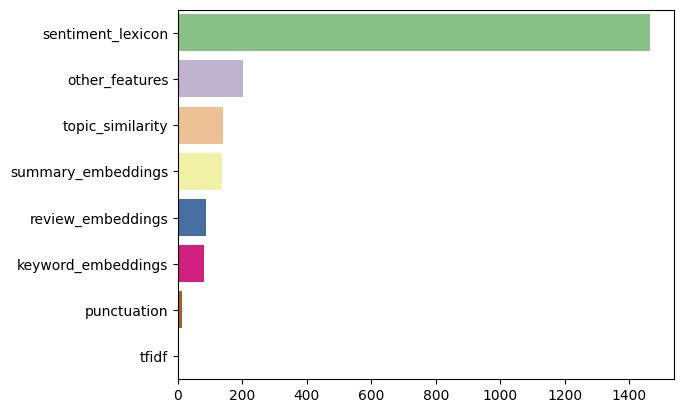

In [116]:
barplot(y =list( aggregated_importances.keys()), x = list(aggregated_importances.values()), palette = "Accent")

### save

In [95]:
import json
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\feature_importances.json"
with open(path, "w") as f:
    json.dump({"Feature Names":feature_importances['Feature Names'].tolist(),
 "Feature Importances":feature_importances['Feature Importances'].tolist()}, f)
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\aggregated_importances.json"
with open(path, "w") as f:
    json.dump(aggregated_importances, f)
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\tfidf_importances.json"
with open(path, "w") as f:
    json.dump({"Feature Names":tfidf_importances['Feature Names'].tolist(),
               "Feature Importances":tfidf_importances['Feature Importances'].tolist()}, f)
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\punctuation_importances.json"
with open(path, "w") as f:
    json.dump({"Feature Names":punctuation_importances['Feature Names'].tolist(),
               "Feature Importances":punctuation_importances['Feature Importances'].tolist()}, f)
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\topic_similarity_importances.json"
with open(path, "w") as f:
    json.dump({"Feature Names":topic_similarity_importances['Feature Names'].tolist(),
               "Feature Importances":topic_similarity_importances['Feature Importances'].tolist()}, f)
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\sentiment_lexicon_importances.json"
with open(path, "w") as f:
    json.dump({"Feature Names":sentiment_lexicon_importances['Feature Names'].tolist(),
               "Feature Importances":sentiment_lexicon_importances['Feature Importances'].tolist()}, f)
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\other_features_importances.json"

with open(path, "w") as f:
    json.dump({"Feature Names":other_features_importances['Feature Names'].tolist(),
               "Feature Importances":other_features_importances['Feature Importances'].tolist()}, f)

In [119]:
topic_words = np.load(r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\topic_words.npy")
word_scores = np.load(r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\word_scores.npy")


In [126]:
topic_words[16],word_scores[16]


(array(['processor', 'ghz', 'gb', 'duo', 'ram', 'core', 'intel', 'amd',
        'quad', 'pentium', 'minimum', 'bit', 'requirements', 'mb', 'dual',
        'memory', 'nvidia', 'vista', 'dell', 'gigs', 'sp', 'system',
        'running', 'xp', 'specs', 'installation', 'hp', 'avchd', 'gig',
        'usb', 'cpu', 'processors', 'speed', 'drive', 'mpeg', 'installed',
        'hardware', 'windows', 'recommended', 'installing', 'card',
        'higher', 'tb', 'install', 'burning', 'required', 'ssd',
        'computer', 'driver', 'drivers'], dtype='<U15'),
 array([0.54744005, 0.5350973 , 0.5155299 , 0.5111776 , 0.50445163,
        0.48587835, 0.47373578, 0.43945694, 0.43414953, 0.4265076 ,
        0.41704538, 0.3784751 , 0.37556484, 0.3661806 , 0.34467733,
        0.32492256, 0.32100564, 0.30987924, 0.3003294 , 0.29330337,
        0.28585738, 0.28485715, 0.28078476, 0.27452192, 0.27155286,
        0.26445597, 0.26144406, 0.25543815, 0.25521773, 0.25456592,
        0.24883406, 0.24077433, 0.23642

In [ ]:
###